# Example: contour plot with colors and labeled lines

In this example, we'll plot the Meridional Overturning (MOC) streamfunction from the CESM-POP ocean component model.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
ds = xr.open_zarr('data/moc.zarr')
ds.info()

xarray.Dataset {
dimensions:
	lat_aux_grid = 395 ;
	moc_z = 61 ;

variables:
	float32 MOC(moc_z, lat_aux_grid) ;
		MOC:cell_methods = time: mean moc_comp: mean transport_reg: mean ;
		MOC:coordinates = lat_aux_grid moc_z onents ion  ;
		MOC:long_name = Meridional Overturning Circulation ;
		MOC:units = Sverdrups ;
	float32 lat_aux_grid(lat_aux_grid) ;
		lat_aux_grid:long_name = latitude grid for transport diagnostics ;
		lat_aux_grid:units = degrees_north ;
		lat_aux_grid:valid_max = 90.0 ;
		lat_aux_grid:valid_min = -79.48815155029297 ;
	float32 moc_z(moc_z) ;
		moc_z:long_name = depth from surface to top of layer ;
		moc_z:positive = down ;
		moc_z:units = centimeters ;
		moc_z:valid_max = 549999.0625 ;
		moc_z:valid_min = 0.0 ;

// global attributes:
	:note = Total global MOC from b.e21.B1850.f09_g17.CMIP6-piControl.001 ;
	:time_period = 1000-1099 ;
}

### Make a "quick-look" plot

Use the `xarray` plot method to take a quick look at the data.

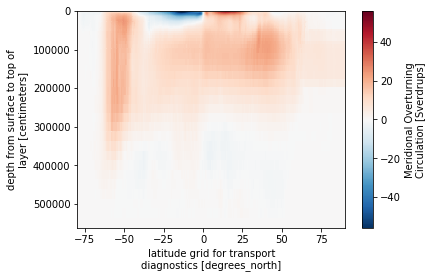

In [3]:
ds.MOC.plot(yincrease=False);

## Make a publication-quality plot

### Set the contour levels.

In [4]:
lo = -40.
hi = 40.
dc = 4.
cnlevels = np.arange(lo, hi+dc, dc)
cnlevels

array([-40., -36., -32., -28., -24., -20., -16., -12.,  -8.,  -4.,   0.,
         4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.])

### Generate the figure

Create a two-panel plot with refined resolution in the upper ocean.

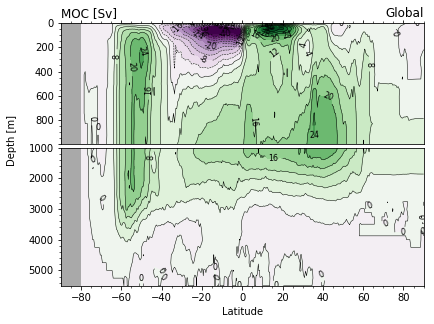

In [5]:
# create a figure object
fig = plt.figure(figsize=(7.2, 4.8))

# add two axes
ax1 = fig.add_axes([0.1, 0.51, 0.7, 0.35]) # top 1000 m
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.4]) # deep ocean

# set the background color where 
ax1.set_facecolor('darkgray')
ax2.set_facecolor('darkgray')

# plot the field by looping over axes
# contour lines
cs = [None]*2 # dimension lists
mesh = [None]*2
for i, ax in enumerate([ax1, ax2]):
    cs[i] = ax.contour(ds.lat_aux_grid, ds.moc_z*1e-2, ds.MOC,
                       colors='k',
                       linewidths=0.5,
                       levels=cnlevels)

    # contour colors
    mesh[i] = ax.contourf(ds.lat_aux_grid, ds.moc_z*1e-2, ds.MOC,
                          levels=cnlevels,
                          cmap='PRGn',
                          extend='both')

# set axis limits, not the reversed limits reverse the y-axis
ax1.set_ylim([1000., 0.])
ax2.set_ylim([5500., 1000.])
ax1.set_xlim([-90, 90])
ax2.set_xlim([-90, 90])

# add contour line labels after axis limits have been set
for csi in cs:
    lb = plt.clabel(csi, fontsize=8, inline=True, fmt='%.0f')    

# set tick properties
ax1.set_xticklabels([])
ax1.set_yticklabels(np.arange(0, 1000, 200))
ax1.minorticks_on()
ax1.xaxis.set_ticks_position('top')

ax2.minorticks_on()
ax2.set_xlabel('Latitude')
ax2.xaxis.set_ticks_position('bottom')

ax2.set_ylabel('Depth [m]')
ax2.yaxis.set_label_coords(-0.12, 1.05)

ax1.set_title('MOC [Sv]',loc='left')
ax1.set_title('Global',loc='right');

### Save figure to file

In [6]:
fig.savefig('moc-plot.png', dpi=300, bbox_inches='tight')